In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [38]:
# Loading Dataset
data = pd.read_csv('dataset.csv', encoding='latin1')
print(data.head())



   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


In [39]:
# Filtering data
desired_genres = ['alternative', 'anime', 'british', 'cantopop', 'children', 'chill', 'comedy', 'dance',
                  'disco', 'disney', 'edm', 'electronic', 'folk', 'french', 'funk', 'indie-pop', 'indie',
                  'j-dance', 'j-idol', 'j-pop', 'jazz', 'k-pop', 'kids', 'latin', 'latino', 'mandopop',
                  'new-age', 'pop-film', 'pop', 'power-pop', 'rock-n-roll', 'rock', 'romance', 'sad', 'ska',
                  'singer-songwriter', 'soul', 'spanish', 'synth-pop', 'tango', 'world-music']

filtered_data = data[data['track_genre'].isin(desired_genres)]
print(filtered_data)



        Unnamed: 0                track_id                   artists  \
3000          3000  5E30LdtzQTGqRvNd7l6kG5         The Neighbourhood   
3001          3001  09gysnJpfQ3ublBmJDfcEC  Amaarae;Kali Uchis;Moliy   
3002          3002  2K7xn816oNHJZ0aVqdQsha         The Neighbourhood   
3003          3003  2QjOHCTQ1Jl3zawyYOpxh6         The Neighbourhood   
3004          3004  4fouWK6XVHhzl78KzQ1UjL                     GAYLE   
...            ...                     ...                       ...   
113995      113995  2C3TZjDRiAzdyViavDJ217             Rainy Lullaby   
113996      113996  1hIz5L4IB9hN3WRYPOCGPw             Rainy Lullaby   
113997      113997  6x8ZfSoqDjuNa5SVP5QjvX            Ces¨¢ria Evora   
113998      113998  2e6sXL2bYv4bSz6VTdnfLs          Michael W. Smith   
113999      113999  2hETkH7cOfqmz3LqZDHZf5            Ces¨¢ria Evora   

                                               album_name  \
3000                                           Wiped Out!   
3001    SAD G

In [40]:
# Processing of data: deletion of missing values, duplicate values and then checking of information
filtered_data = filtered_data.dropna()
filtered_data = filtered_data.drop_duplicates()
print(filtered_data.info())



<class 'pandas.core.frame.DataFrame'>
Int64Index: 40999 entries, 3000 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40999 non-null  int64  
 1   track_id          40999 non-null  object 
 2   artists           40999 non-null  object 
 3   album_name        40999 non-null  object 
 4   track_name        40999 non-null  object 
 5   popularity        40999 non-null  int64  
 6   duration_ms       40999 non-null  int64  
 7   explicit          40999 non-null  bool   
 8   danceability      40999 non-null  float64
 9   energy            40999 non-null  float64
 10  key               40999 non-null  int64  
 11  loudness          40999 non-null  float64
 12  mode              40999 non-null  int64  
 13  speechiness       40999 non-null  float64
 14  acousticness      40999 non-null  float64
 15  instrumentalness  40999 non-null  float64
 16  liveness          40999 non-null  fl

In [41]:
# Create speechiness_type feature
filtered_data['speechiness_type'] = pd.cut(filtered_data['speechiness'], bins=[0, 0.33, 0.66, 1], labels=['Low', 'Medium', 'High'])
print(filtered_data['speechiness_type'].value_counts())



Low       39002
Medium     1167
High        825
Name: speechiness_type, dtype: int64


In [42]:
# Checking classification features
feature_categorical = [feature for feature in filtered_data.columns if filtered_data[feature].dtype == 'O']
print('Number of categorical features:', len(feature_categorical))
print(filtered_data[feature_categorical].head())



Number of categorical features: 5
                    track_id                   artists  \
3000  5E30LdtzQTGqRvNd7l6kG5         The Neighbourhood   
3001  09gysnJpfQ3ublBmJDfcEC  Amaarae;Kali Uchis;Moliy   
3002  2K7xn816oNHJZ0aVqdQsha         The Neighbourhood   
3003  2QjOHCTQ1Jl3zawyYOpxh6         The Neighbourhood   
3004  4fouWK6XVHhzl78KzQ1UjL                     GAYLE   

                                             album_name  \
3000                                         Wiped Out!   
3001  SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...   
3002    Hard To Imagine The Neighbourhood Ever Changing   
3003                                        I Love You.   
3004                                            abcdefu   

                                             track_name  track_genre  
3000                                       Daddy Issues  alternative  
3001  SAD GIRLZ LUV MONEY Remix (feat. Kali Uchis an...  alternative  
3002                                           So

In [43]:
# Checking numerical characteristics
feature_numerical = [feature for feature in filtered_data.columns if filtered_data[feature].dtype != 'O']
print('Number of numerical columns=', len(feature_numerical))
print(filtered_data[feature_numerical].head())



Number of numerical columns= 17
      Unnamed: 0  popularity  duration_ms  explicit  danceability  energy  \
3000        3000          87       260173     False         0.588   0.521   
3001        3001          79       204763      True         0.870   0.523   
3002        3002          86       206280     False         0.575   0.568   
3003        3003          93       240400     False         0.612   0.807   
3004        3004          86       168601      True         0.695   0.540   

      key  loudness  mode  speechiness  acousticness  instrumentalness  \
3000   10    -9.461     1       0.0329        0.0678          0.149000   
3001    1    -8.052     0       0.0602        0.4330          0.000021   
3002    9    -5.509     0       0.0300        0.0484          0.000417   
3003   10    -2.810     1       0.0336        0.0495          0.017700   
3004    4    -5.692     1       0.0493        0.2990          0.000000   

      liveness  valence    tempo  time_signature speechiness

In [44]:
# Selection of discrete and continuous numerical features
feature_discrete_numerical = [feature for feature in feature_numerical if filtered_data[feature].nunique() < 50]
feature_continuous_numerical = [feature for feature in feature_numerical if feature not in feature_discrete_numerical]



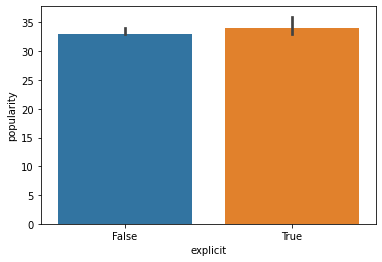

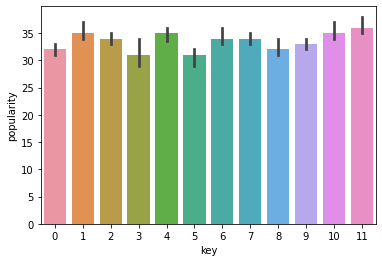

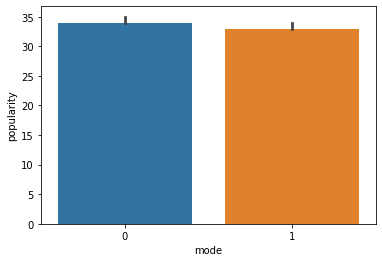

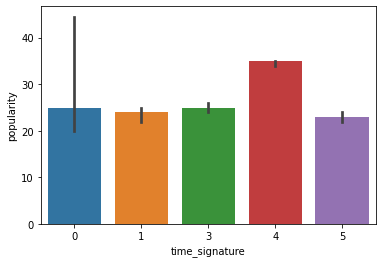

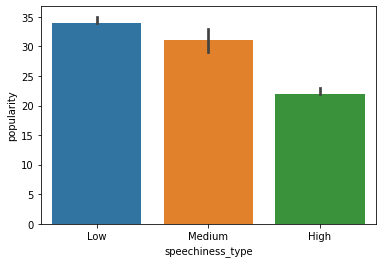

In [45]:
# Relationship between discrete numerical features and prevalence
for feature in feature_discrete_numerical:
    sns.barplot(x=feature, y='popularity', data=filtered_data, estimator=np.median)
    plt.show()



Unnamed: 0 skewness is: -0.12237644523278503


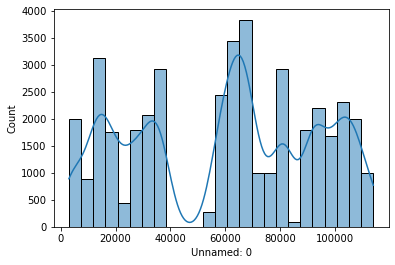

popularity skewness is: 0.07120645665562615


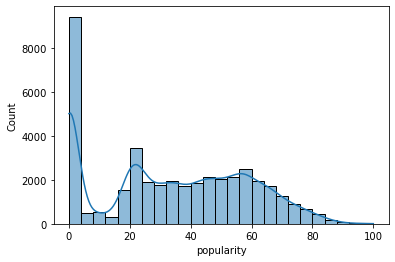

duration_ms skewness is: 6.88016406178593


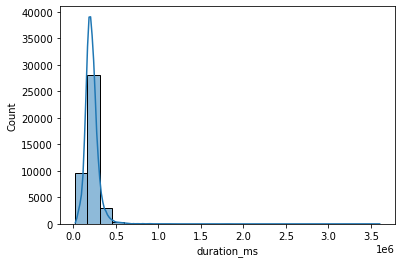

danceability skewness is: -0.34623829366621706


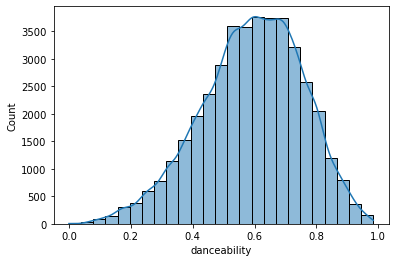

energy skewness is: -0.3560057420139535


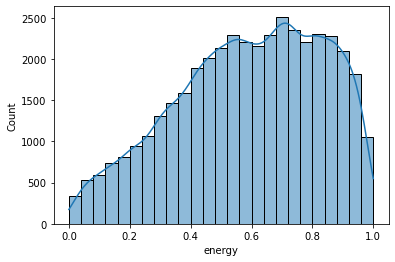

loudness skewness is: -1.5585560819985373


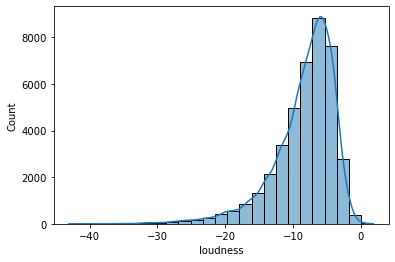

speechiness skewness is: 4.205626248886963


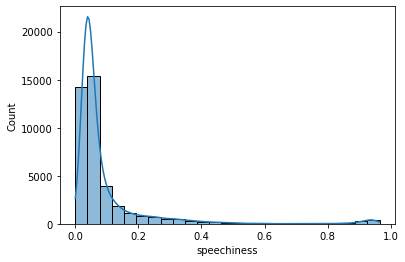

acousticness skewness is: 0.4425393342170693


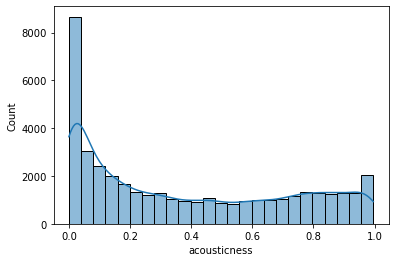

instrumentalness skewness is: 2.867443603308665


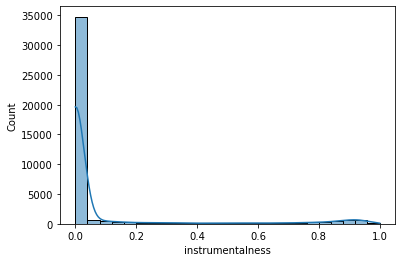

liveness skewness is: 2.2906384103870625


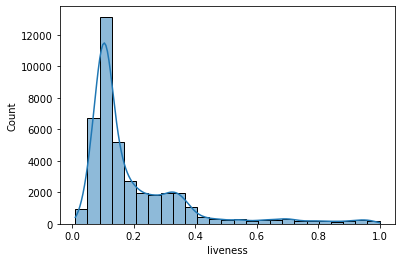

valence skewness is: 0.03350404566242453


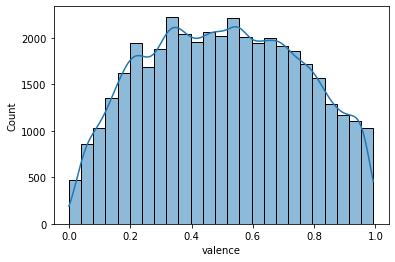

tempo skewness is: 0.4210119685000567


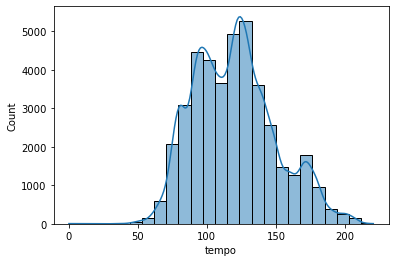

In [46]:
# Skewness of continuous numerical features
from scipy.stats import skew
for feature in feature_continuous_numerical:
    print(feature, 'skewness is:', skew(filtered_data[feature]))
    sns.histplot(x=feature, data=filtered_data, bins=25, kde=True)
    plt.show()



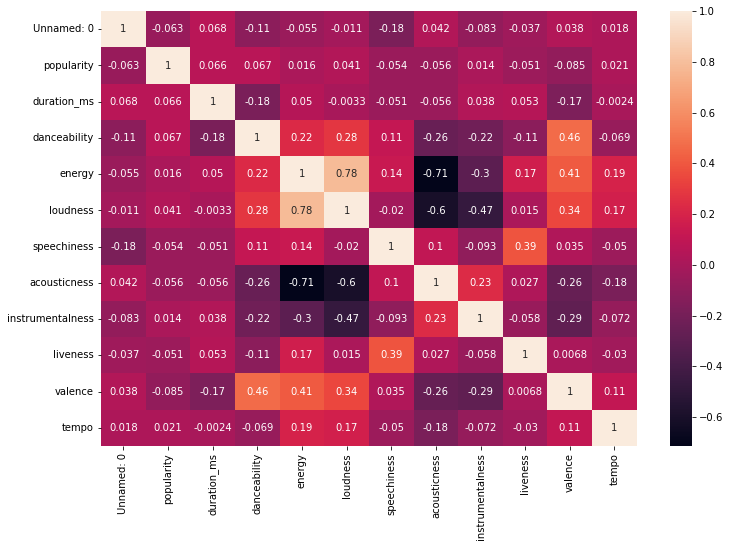

In [47]:
# Correlation heat maps for continuous numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(filtered_data[feature_continuous_numerical].corr(), annot=True)
plt.show()



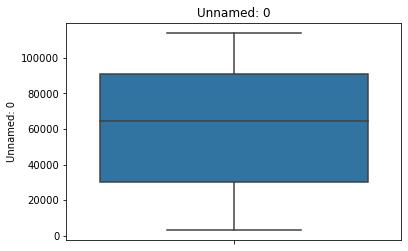

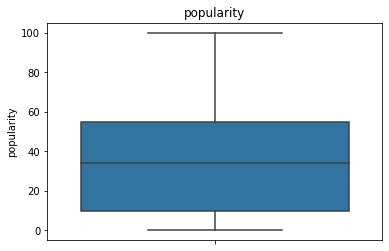

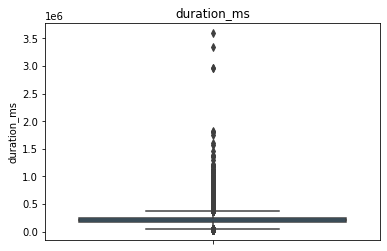

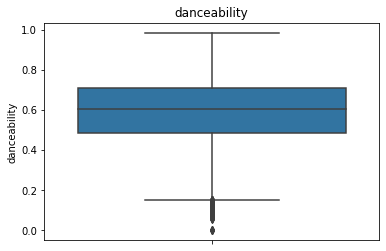

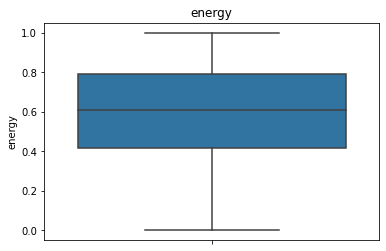

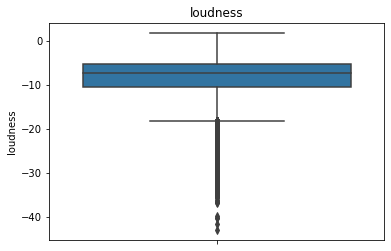

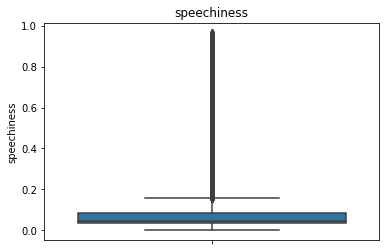

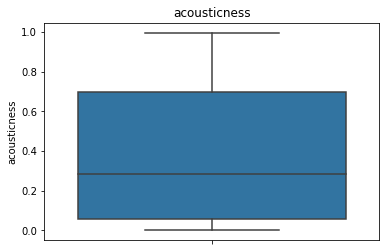

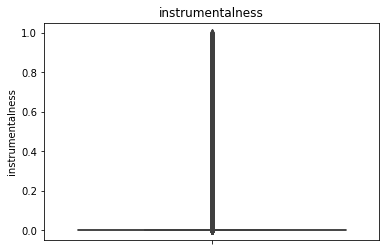

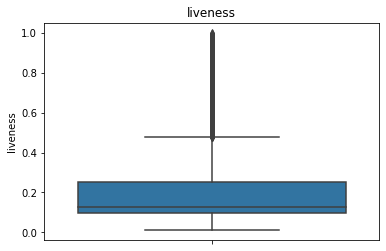

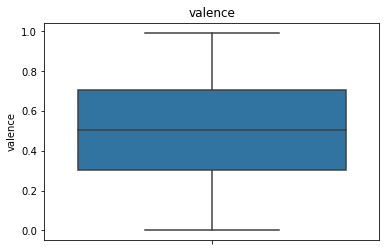

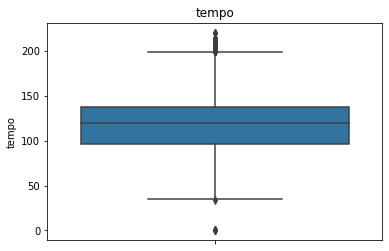

In [48]:
# Plotting box plots of continuous numerical features to check for outliers
for feature in feature_continuous_numerical:
    sns.boxplot(data=filtered_data, y=feature)
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()


In [49]:
# Data transformation of continuous numerical features
dataset_log = filtered_data.copy()
dataset_reci = filtered_data.copy()
dataset_sqrt = filtered_data.copy()
dataset_expo = filtered_data.copy()



In [50]:
from scipy import stats
for feature in feature_continuous_numerical:
    dataset_log[feature] = np.log(dataset_log[feature] + 1)
    dataset_reci[feature] = 1 / (dataset_reci[feature] + 1)
    dataset_sqrt[feature] = dataset_sqrt[feature] ** (1 / 2)
    dataset_expo[feature] = dataset_expo[feature] ** (1 / 5)



D:\kfkfk\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


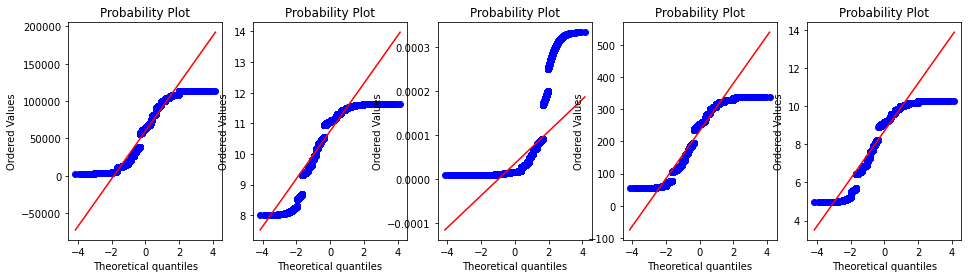

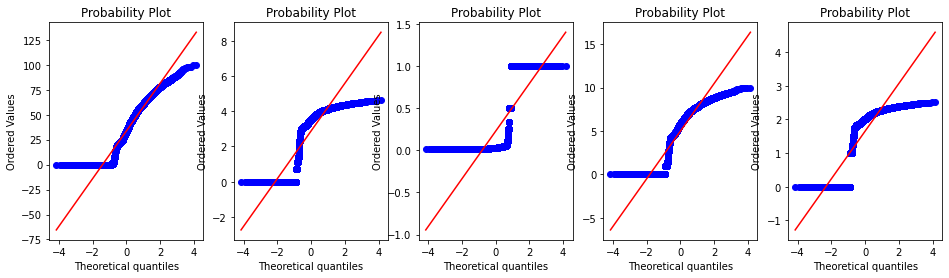

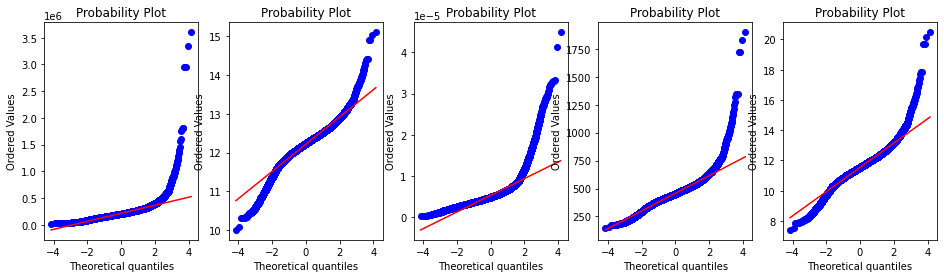

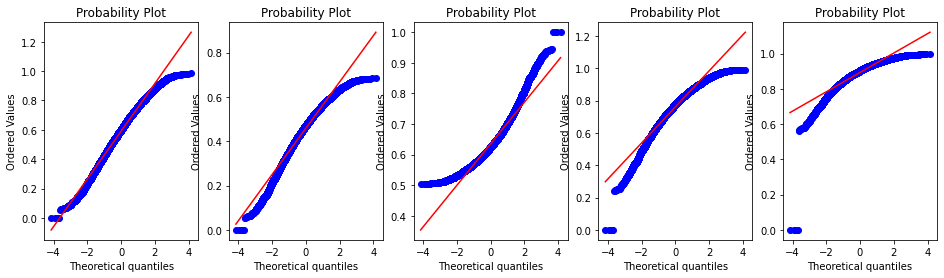

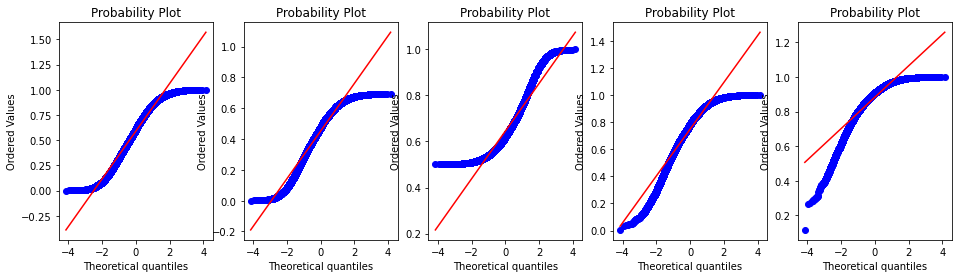

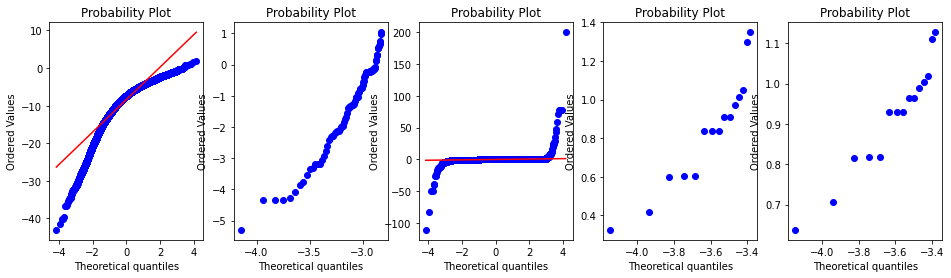

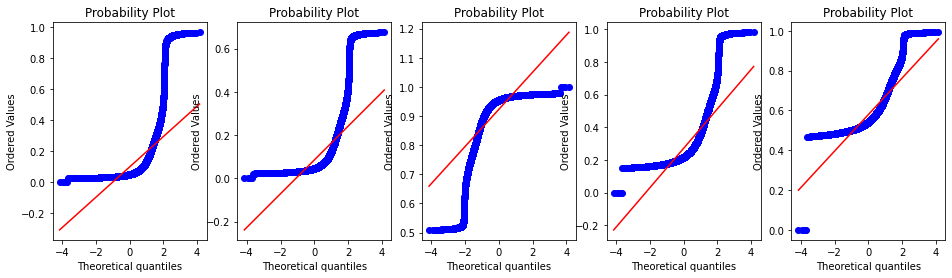

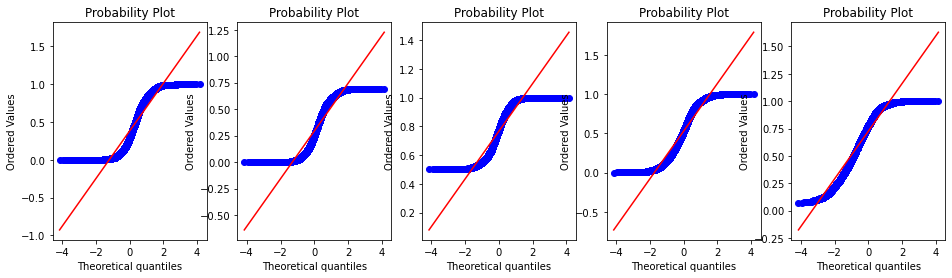

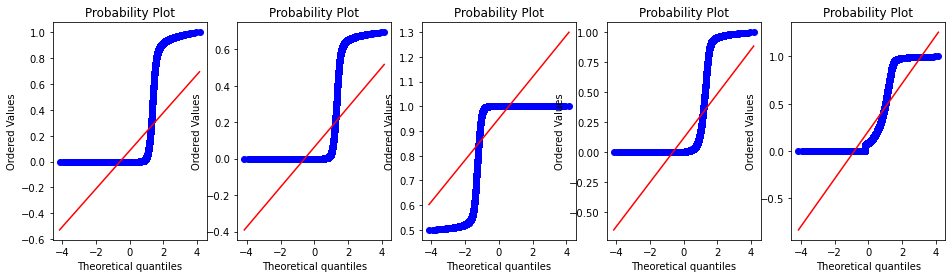

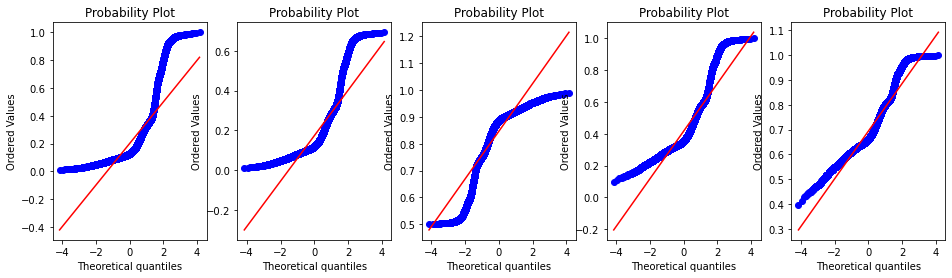

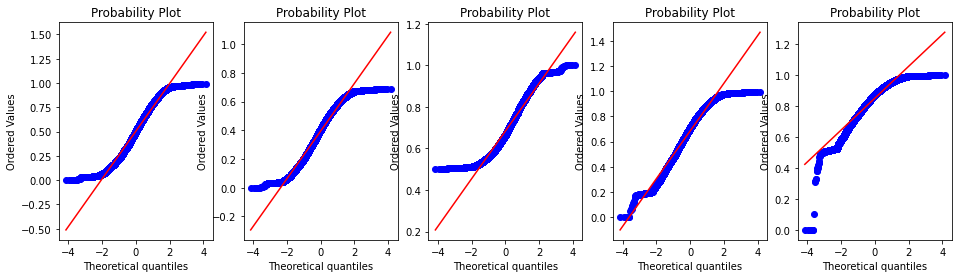

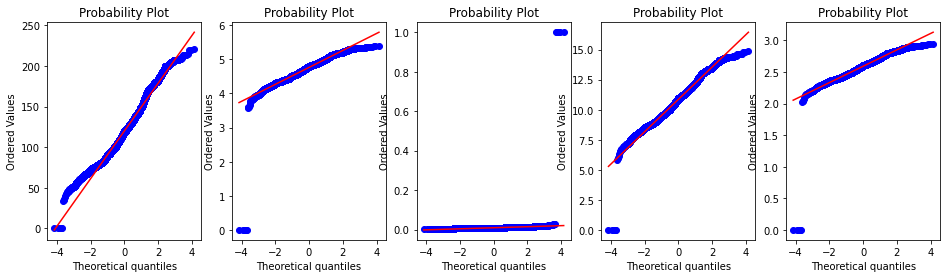

In [51]:
# Plotting the transformed data distribution
for feature in feature_continuous_numerical:
    plt.figure(figsize=(16, 4))
    plt.subplot(1, 5, 1)
    stats.probplot(filtered_data[feature], dist='norm', plot=plt)
    plt.subplot(1, 5, 2)
    stats.probplot(dataset_log[feature], dist='norm', plot=plt)
    plt.subplot(1, 5, 3)
    stats.probplot(dataset_reci[feature], dist='norm', plot=plt)
    plt.subplot(1, 5, 4)
    stats.probplot(dataset_sqrt[feature], dist='norm', plot=plt)
    plt.subplot(1, 5, 5)
    stats.probplot(dataset_expo[feature], dist='norm', plot=plt)
    plt.show()



In [52]:
# Classification feature codes
# !pip install category_encoders
import category_encoders as ce
encoder1 = ce.BaseNEncoder(cols=['track_genre', 'album_name', 'track_name', 'artists'], base=10, return_df=True)
filtered_data = encoder1.fit_transform(filtered_data)
filtered_data = pd.get_dummies(data=filtered_data, columns=['speechiness_type'], drop_first=True)



In [53]:
# Feature Scaling
filtered_data['explicit'] = np.where(filtered_data['explicit'] == False, 0, 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features_scaling = [feature for feature in feature_numerical if feature not in ['popularity', 'mode', 'speechiness_type']]
filtered_data[features_scaling] = scaler.fit_transform(filtered_data[features_scaling])




In [54]:
# Feature Selection
X = filtered_data.drop(['popularity'], axis=1)
y = filtered_data['popularity']



In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)


(28699, 35) (12300, 35)
(28699,) (12300,)


In [56]:
def correlation(dataset, threshold):
    correlated_columns = set()
    correlation_matrix = dataset.corr()
    for i in range(len(correlation_matrix.columns)):
        for j in range(i):
            if abs(correlation_matrix.iloc[i, j]) > threshold:
                colname = correlation_matrix.columns[i]
                correlated_columns.add(colname)
    return correlated_columns


In [57]:
corr_features=correlation(X_train,0.7)
print(len(set(corr_features)))
print(corr_features)

5
{'track_name_0', 'acousticness', 'loudness', 'speechiness_type_High', 'track_genre_0'}


In [58]:
X_train_corr=X_train.copy()
X_test_corr=X_test.copy()

In [59]:
X_train_corr.drop(corr_features, axis=1, inplace=True)
X_test_corr.drop(corr_features, axis=1, inplace=True)
print(X_train_corr.shape, X_test_corr.shape)

(28699, 30) (12300, 30)


In [60]:
X_train_corr.isna().sum()

Unnamed: 0                 0
track_id                   0
artists_0                  0
artists_1                  0
artists_2                  0
artists_3                  0
artists_4                  0
album_name_0               0
album_name_1               0
album_name_2               0
album_name_3               0
album_name_4               0
track_name_1               0
track_name_2               0
track_name_3               0
track_name_4               0
duration_ms                0
explicit                   0
danceability               0
energy                     0
key                        0
mode                       0
speechiness                0
instrumentalness           0
liveness                   0
valence                    0
tempo                      0
time_signature             0
track_genre_1              0
speechiness_type_Medium    0
dtype: int64

In [64]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy in d:\kfkfk\lib\site-packages (from xgboost) (1.21.5)



In [65]:
#Model training
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import BayesianRidge

In [66]:
lr=LinearRegression()
lasso=Lasso()
ridge=Ridge()
xgbreg=XGBRegressor()
xgbrfreg=XGBRFRegressor()
dtree=DecisionTreeRegressor()
bayridge=BayesianRidge()

In [67]:
def model(name):
    name.fit(X_train_corr,y_train)
    prediction=name.predict(X_test_corr)
    residual=y_test-prediction
    
    plt.figure(figsize=(15,6))
    
    plt.subplot(1,2,1)
    plt.scatter(y_test,prediction)
    
    plt.subplot(1,2,2)
    sns.distplot(residual, hist=False, kde=True)
    plt.show()

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [70]:
non_numeric_cols = X_train_corr.select_dtypes(include='object').columns
print(non_numeric_cols)
X_train_corr = X_train_corr.drop(columns=non_numeric_cols)
X_test_corr = X_test_corr.drop(columns=non_numeric_cols)


Index(['track_id'], dtype='object')


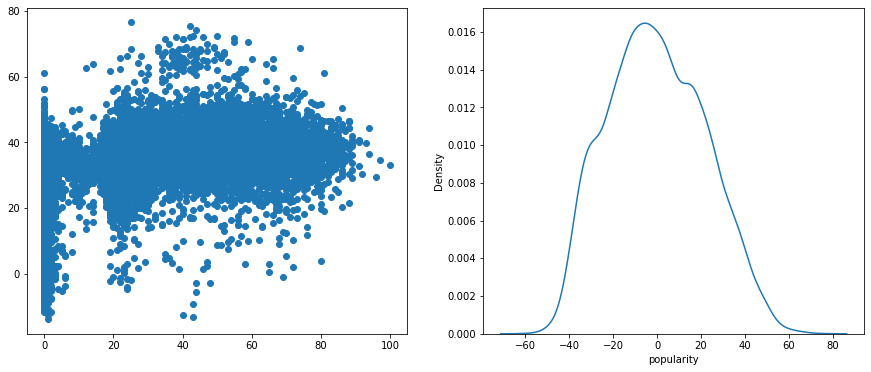

In [71]:
model(lr)

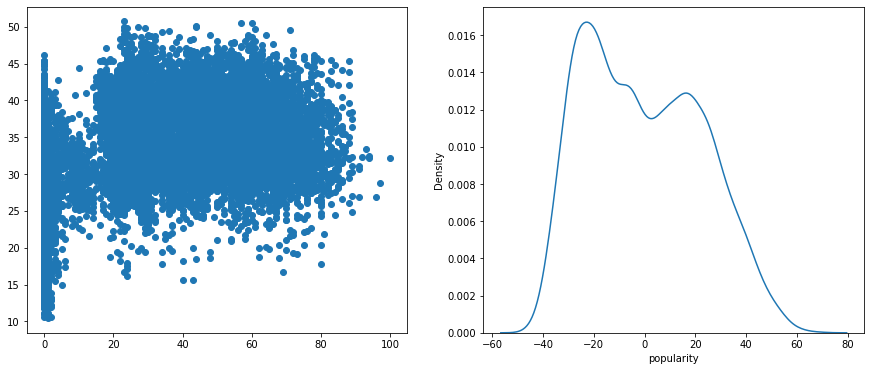

In [72]:
model(lasso)

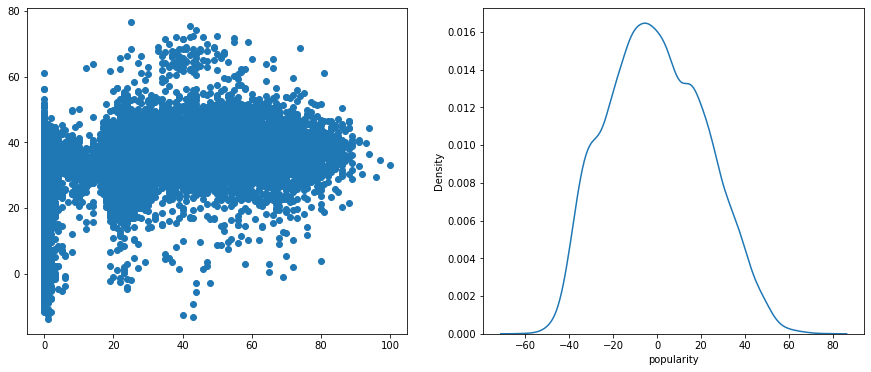

In [73]:
model(ridge)

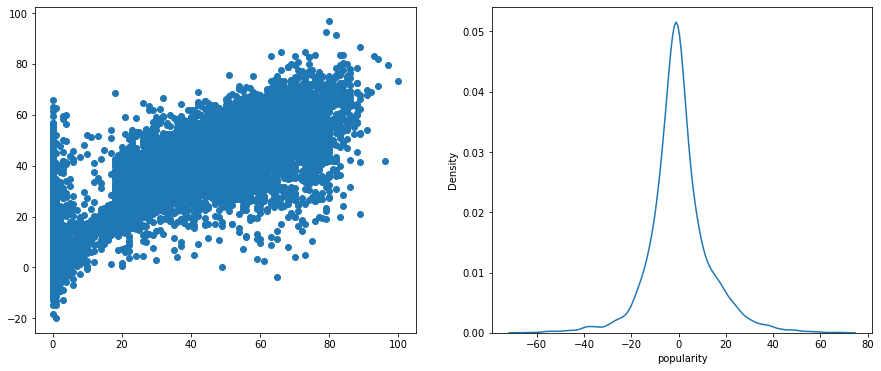

In [74]:
model(xgbreg)

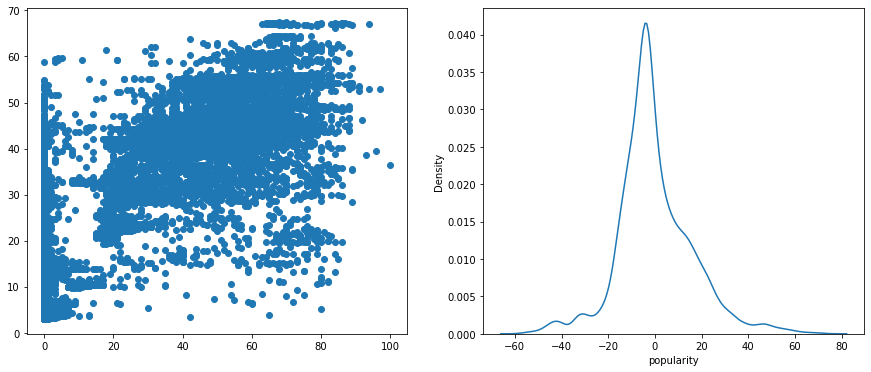

In [75]:
model(xgbrfreg)

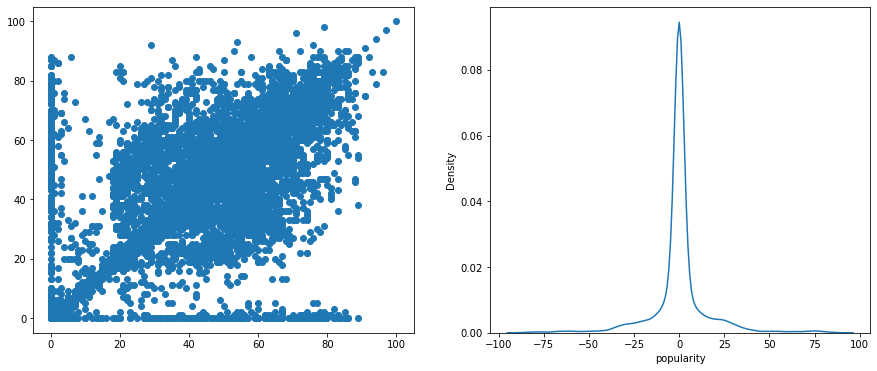

In [76]:
model(dtree)

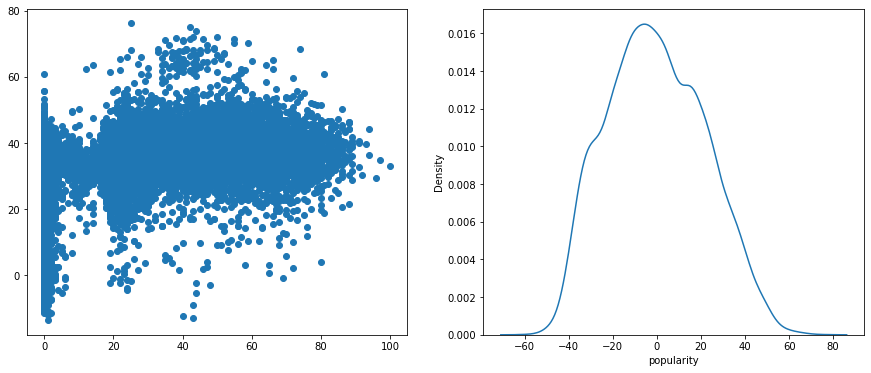

In [77]:
model(bayridge)

In [78]:
# Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

In [80]:
algos=[lr, lasso, ridge, xgbreg, xgbrfreg, dtree, bayridge]
MSE=[]
ABMSE=[]
R2_score=[]
for feature in algos:
    prediction=feature.predict(X_test_corr)
    mse=mean_squared_error(y_test, prediction)
    abmse=mean_absolute_error(y_test, prediction)
    score=r2_score(y_test, prediction)
    MSE.append(mse)
    ABMSE.append(abmse)
    R2_score.append(score)

In [81]:
algosname=['Linear Regression', 'Lasso', 'Ridge', 'XGBoost', 'XGBoostRandomForest','DecisionTree','BayesianRidge']
metrics=pd.DataFrame(list(zip(algosname,MSE,ABMSE,R2_score)), columns=['Model','MSE', 'ABMSE', 'R2_score'])

In [82]:
metrics

,Model,MSE,ABMSE,R2_score
0,Linear Regression,485.846103,18.232900,0.211711
1,Lasso,530.967015,19.786577,0.138502
2,Ridge,485.844396,18.233184,0.211714
3,XGBoost,163.811415,8.790483,0.734215
4,XGBoostRandomForest,260.067761,11.792383,0.578038
5,DecisionTree,254.146829,7.872520,0.587645
6,BayesianRidge,485.833019,18.236149,0.211732


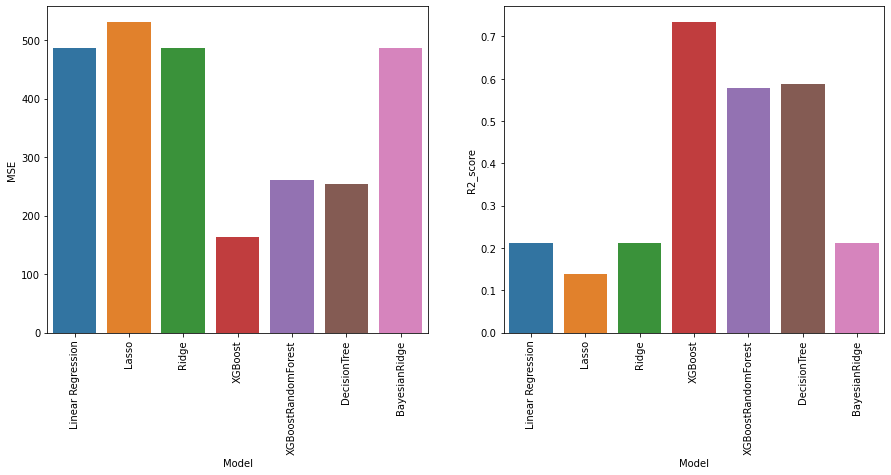

In [83]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.barplot(x='Model', y='MSE', data=metrics)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.barplot(x='Model', y='R2_score', data=metrics)
plt.xticks(rotation=90)
plt.show()

In [84]:
# Simulation of forecasts
# Select 10 songs to simulate predictions
sample_data = X_test_corr.sample(n=10, random_state=42)
actual_popularity = y_test[sample_data.index]


In [85]:
# Prediction using the best model
predicted_popularity = xgbreg.predict(sample_data)

In [86]:
# Put the actual popularity and the predicted popularity in the same DataFrame for comparison:
comparison_df = pd.DataFrame({
    'Actual Popularity': actual_popularity,
    'Predicted Popularity': predicted_popularity
})
print(comparison_df)


        Actual Popularity  Predicted Popularity
70401                  55             56.005577
104963                 26             32.200481
80795                  56             52.732906
34873                  43             48.508194
113983                 37             42.278992
99914                  54             56.299084
20937                   0              1.179955
104673                 28             42.712780
93556                   0              1.603685
34921                  62             49.623737


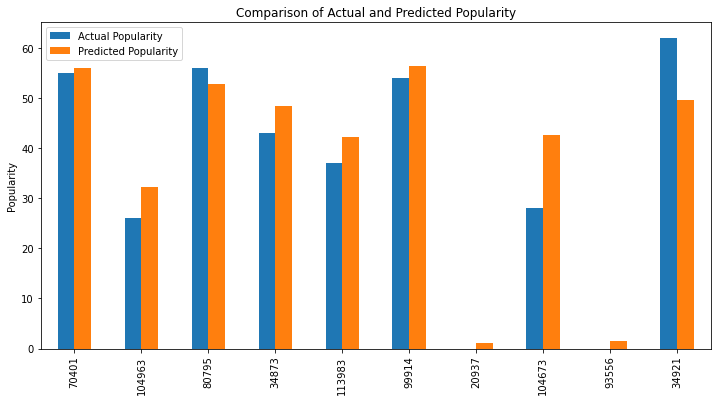

In [87]:
comparison_df.plot(kind='bar', figsize=(12, 6))
plt.ylabel('Popularity')
plt.title('Comparison of Actual and Predicted Popularity')
plt.show()
